In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings('ignore')

In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [136]:
aa = pd.read_csv("data/totalData6.csv",encoding="CP949")

In [137]:
aa

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,35.8,18.3,-13.2,9.3,2.6,19.40,808.90,360,8351,42.5
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,34.0,17.4,-13.8,8.5,2.0,22.30,702.50,358,8162,42.9
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,35.4,18.5,-11.7,10.1,1.8,18.10,718.50,156,13963,41.8
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,34.2,18.0,-10.5,10.5,2.1,24.30,916.50,77,7805,40.5
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,35.4,18.5,-11.2,10.2,1.7,19.90,852.50,108,14021,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,22,관악구,4879,0.699119,135,501226,16951,19,945,6.73,...,34.4,17.1,-14.5,7.2,1.9,13.35,1820.25,270,13750,43.1
221,22,서초구,4459,0.694775,876,408451,8696,21,1142,6.96,...,36.1,18.5,-12.7,8.9,1.5,14.70,1968.50,126,3888,42.1
222,22,강남구,6947,0.722614,468,534103,13522,23,1608,6.35,...,36.8,18.8,-12.8,9.2,1.6,19.10,1709.50,379,4758,42.3
223,22,송파구,5167,0.659764,431,664514,19616,22,1084,7.06,...,36.7,18.5,-13.0,10.1,1.6,11.50,1949.50,225,5627,42.6


In [138]:
aa.shape

(225, 24)

In [139]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        225 non-null    int64  
 1   자치구       225 non-null    object 
 2   발생        225 non-null    int64  
 3   검거율       225 non-null    float64
 4   cctv      225 non-null    int64  
 5   인구        225 non-null    int64  
 6   인구밀도      225 non-null    int64  
 7   파출소현황     225 non-null    int64  
 8   경찰관       225 non-null    int64  
 9   행복지수      225 non-null    float64
 10  월간 음주율    225 non-null    float64
 11  우울감 경험률   225 non-null    float64
 12  지가변동평균    225 non-null    float64
 13  평균기온      225 non-null    float64
 14  최고기온      225 non-null    float64
 15  평균최고기온    225 non-null    float64
 16  최저기온      225 non-null    float64
 17  평균최저기온    225 non-null    float64
 18  평균풍속      225 non-null    float64
 19  최대 순간 풍속  225 non-null    float64
 20  강수량합      225 non-null    float6

# 원핫 인코딩

In [140]:
aa["자치구"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [141]:
ohe=OneHotEncoder()

In [142]:
gu_arr=np.array(aa["자치구"])


In [143]:
gu_arr=np.reshape(gu_arr,(-1,1))

In [144]:
ohe_gu=ohe.fit_transform(gu_arr)

In [145]:
ohe_gu

<225x25 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [146]:
ohe.get_feature_names_out()

array(['x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구',
       'x0_구로구', 'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구',
       'x0_마포구', 'x0_서대문구', 'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구',
       'x0_양천구', 'x0_영등포구', 'x0_용산구', 'x0_은평구', 'x0_종로구', 'x0_중구',
       'x0_중랑구'], dtype=object)

In [147]:
aa.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [148]:
ohe_gu_df=pd.DataFrame(ohe_gu.toarray(),columns=ohe.get_feature_names_out())

In [149]:
ohe_gu_df.head()

,x0_강남구,x0_강동구,x0_강북구,x0_강서구,x0_관악구,x0_광진구,x0_구로구,x0_금천구,x0_노원구,x0_도봉구,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
ohe_aa_df=pd.concat([aa,ohe_gu_df],axis=1)

In [151]:
ohe_aa_df.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 발생 예측

In [152]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
X = ohe_aa_df.drop(columns=['발생'])
y = ohe_aa_df['발생']

In [154]:
x=X.iloc[:200,] # 21년도까지 

In [155]:
y=y.iloc[:200]

In [156]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x['자치구'] = le.fit_transform(x['자치구']) # 자치구 오류를 줄이기 위한 문자 변환

In [157]:
x

,연도,자치구,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,14,22,0.918144,103,165344,6914,26,1083,6.90,55.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14,23,0.609444,77,136227,13677,20,985,6.56,61.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14,20,0.615952,68,249914,11428,13,655,6.72,57.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14,15,0.571748,110,303891,18028,16,613,6.90,64.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,5,0.563338,176,377375,22117,11,653,6.74,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,21,4,0.705221,549,499449,16891,19,913,6.23,53.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,21,14,0.667123,566,416167,8858,21,1121,6.38,51.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,21,0,0.715425,514,537800,13616,23,1569,6.53,52.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,21,17,0.692830,151,663965,19599,22,1047,6.45,56.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# 상관 행렬 계산
correlation_matrix = x.corr().abs()

# 상관 관계가 높은 특성 선택
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
features = [column for column in upper.columns if any(upper[column] > 0.2)] # 상관계수 0.2이상인 컬럼만

x = x[features] 

In [159]:
num_samples, num_features = x.shape

In [160]:
num_samples

200

In [161]:
x

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,0.918144,103,165344,6914,26,1083,6.90,55.7,9.0,2.410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.609444,77,136227,13677,20,985,6.56,61.2,8.6,2.563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.615952,68,249914,11428,13,655,6.72,57.6,9.5,1.491,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.571748,110,303891,18028,16,613,6.90,64.8,9.1,1.848,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.563338,176,377375,22117,11,653,6.74,56.0,7.5,1.822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.705221,549,499449,16891,19,913,6.23,53.4,4.3,5.147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.667123,566,416167,8858,21,1121,6.38,51.1,5.5,5.946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.715425,514,537800,13616,23,1569,6.53,52.5,7.3,6.110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.692830,151,663965,19599,22,1047,6.45,56.5,9.1,5.692,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler() # 정규화

x = ss.fit_transform(x)

In [29]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

# knr

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
knr = KNeighborsRegressor(n_neighbors=3)

In [110]:
knr.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
# 테스트 세트에 대한 예측
y_pred = knr.predict(X_valid)

In [34]:
y_pred

array([6386.        , 4998.33333333, 3351.66666667, 6957.33333333,
       3836.66666667, 3248.33333333, 3933.66666667, 4321.66666667,
       3240.33333333, 3836.66666667, 4686.33333333, 4068.66666667,
       3933.66666667, 4823.33333333, 3933.66666667, 3777.33333333,
       4032.33333333, 3933.66666667, 3240.33333333, 4965.66666667,
       3478.66666667, 5994.66666667, 5994.66666667, 2119.33333333,
       4883.66666667, 5274.        , 4627.66666667, 4123.        ,
       7056.66666667, 3475.33333333, 5302.33333333, 3933.66666667,
       3486.33333333, 3505.66666667, 7880.33333333, 3736.66666667,
       4823.33333333, 5292.33333333, 3676.33333333, 4274.        ])

In [35]:
# 예측값과 실제값을 데이터프레임으로 합치기
df_result = pd.DataFrame({'실제값': Y_valid, '예측값': y_pred})


In [36]:
df_result

,실제값,예측값
18,7003,6386.000000
170,5261,4998.333333
107,3042,3351.666667
98,5576,6957.333333
177,2381,3836.666667
182,2411,3248.333333
5,4363,3933.666667
146,5542,4321.666667
12,4194,3240.333333
152,2969,3836.666667


In [37]:
print(mean_squared_error(y_pred,Y_valid)**(1/2)) #RMSE

752.3570129931667


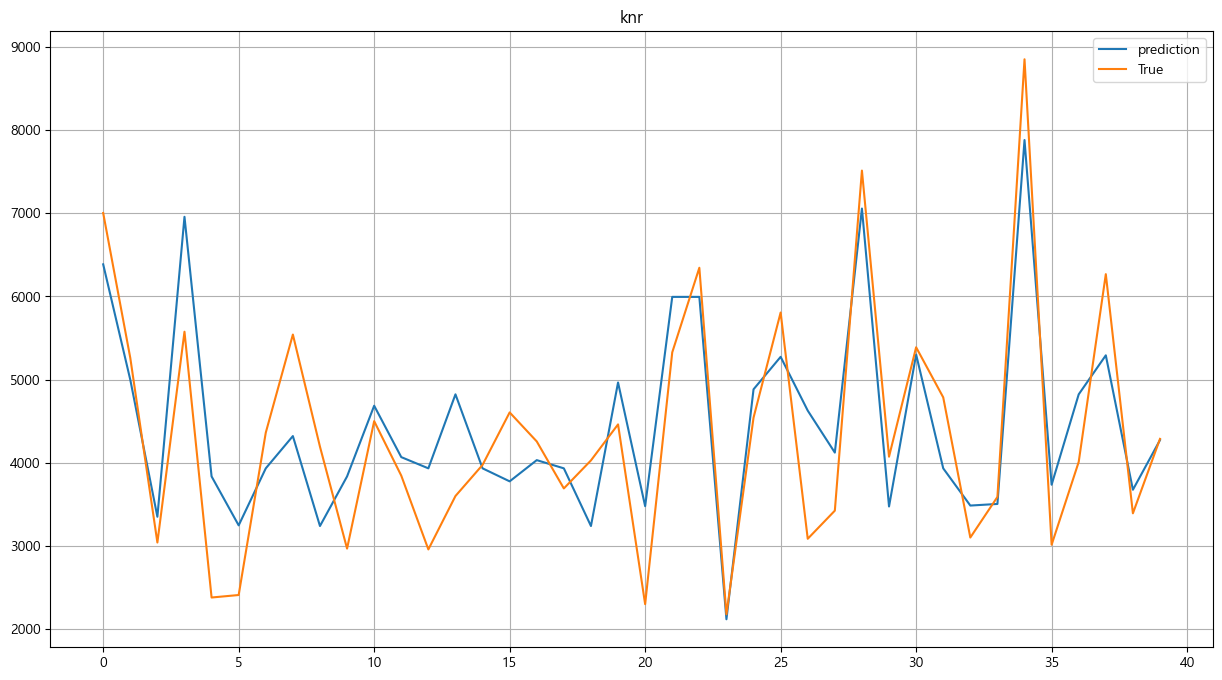

In [38]:
# 시각화
x_axis = np.arange(0, len(Y_valid))

fig = plt.figure(figsize = (15,8))
plt.title("knr")
plt.plot(x_axis ,y_pred, label = "prediction")
plt.plot(x_axis, Y_valid, label = "True") 
plt.legend()
plt.grid(True)
plt.show()

### 22년도 예측

In [73]:
ohe_aa_df[['발생']].iloc[200:]

,발생
200,3138
201,3071
202,2967
203,2194
204,3619
205,3253
206,3599
207,2749
208,2832
209,2141


In [85]:
X_test = ohe_aa_df.drop(columns=['발생']).iloc[200:]
y_test = ohe_aa_df['발생'].iloc[200:]

In [86]:
X_test1=X_test[features] # 상관계수로 컬럼선택한 리스트들로 컬럼 설정

In [87]:
X_test2 = ss.transform(X_test1)

In [89]:
X_test3 = pd.DataFrame(X_test2, columns=X_test1.columns)

In [90]:
X_test3

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,0.920930,0.150037,0.037070,-0.003032,1.0000,0.531160,0.530488,0.508961,0.694737,0.232693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.322901,0.098300,-0.001819,0.307834,0.5625,0.472675,0.250000,0.523297,0.589474,0.138870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.348772,0.339985,0.184220,0.194670,0.1875,0.268456,0.286585,0.480287,0.157895,0.261711,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.386459,0.168514,0.283957,0.491845,0.3750,0.117929,0.585366,0.580645,0.505263,0.437612,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.323308,0.198817,0.398336,0.650356,0.1875,0.215724,0.304878,0.706093,0.663158,0.168578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.315898,0.231338,0.402600,0.847324,0.6875,0.298178,0.445122,0.548387,0.115789,0.189996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.410373,0.214339,0.468919,0.673604,0.5000,0.244487,0.542683,0.659498,0.431579,0.116347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.462133,0.246859,0.563018,0.530760,1.0000,0.396932,0.560976,0.612903,0.557895,0.080835,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.553253,0.586105,0.301141,0.284080,0.3125,0.158198,0.298780,0.465950,0.252632,0.051541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.394747,0.433851,0.330703,0.403124,0.0000,0.046021,0.359756,0.394265,0.568421,0.057759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
pred = knr.predict(X_test3)

In [92]:
pred

array([3742.66666667, 3834.33333333, 3836.66666667, 2615.        ,
       4823.33333333, 3933.66666667, 4446.        , 3248.33333333,
       3478.66666667, 2036.        , 3986.33333333, 3717.66666667,
       2825.33333333, 4902.        , 3736.66666667, 4411.66666667,
       4185.33333333, 2714.        , 5322.66666667, 3310.        ,
       5994.66666667, 4321.66666667, 7074.        , 5404.66666667,
       3989.33333333])

In [93]:
print(mean_squared_error(pred,y_test)**(1/2)) #RMSE

587.0667537285119


# 시각화

In [94]:
crime_pred = pd.DataFrame(pred)

In [95]:
crime_pred = crime_pred.rename(columns={0: '예측 발생'})

In [96]:
crime_pred2 = pd.concat([aa.tail(25).reset_index(drop=True), crime_pred.reset_index(drop=True)], axis=1)

In [97]:
crime_pred2.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,예측 발생
0,22,종로구,3138,1.046526,207,152211,6365,26,1080,6.90,...,18.0,-13.7,9.2,2.4,17.925,1775.3,291,9106,45.6,3742.666667
1,22,중구,3071,0.690003,137,130785,13131,19,1019,6.44,...,16.9,-15.8,8.2,2.5,21.600,1452.5,263,9288,46.1,3834.333333
2,22,용산구,2967,0.705426,464,233284,10668,13,806,6.50,...,18.4,-12.4,9.8,1.9,18.400,1699.0,116,14332,44.4,3836.666667
3,22,성동구,2194,0.727894,232,288234,17136,16,649,6.99,...,18.8,-12.9,11.0,1.9,19.900,1727.5,59,6682,43.8,2615.000000
4,22,광진구,3619,0.690246,273,351252,20586,13,751,6.53,...,18.4,-12.9,9.3,1.5,12.400,1918.0,83,12631,43.3,4823.333333


<Figure size 1000x500 with 0 Axes>

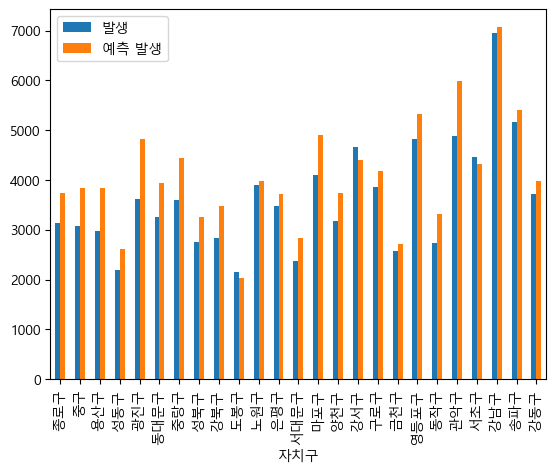

In [98]:
plt.figure(figsize=(10, 5))  
crime_pred2.plot(x="자치구",y=["발생","예측 발생"],kind="bar")
plt.show()